# Python for Data Analysis


#### Research Computing Services
Website: [rcs.bu.edu](http://www.bu.edu/tech/support/research/) <br>
Tutorial materials: [http://rcs.bu.edu/examples/python/data_analysis](http://rcs.bu.edu/examples/python/data_analysis)


In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pandas is a python package that deals mostly with :
- **Series**  (1d homogeneous array)
- **DataFrame** (2d labeled heterogeneous array) 
- **Panel** (general 3d array)

### Pandas Series

Pandas *Series* is one-dimentional labeled array containing data of the same type (integers, strings, floating point numbers, Python objects, etc. ). The axis labels are often referred to as *index*.

In [2]:
# Example of creating Pandas series :
s1 = pd.Series( [-3,-1,1,3,5] )
print(s1)

0   -3
1   -1
2    1
3    3
4    5
dtype: int64


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1

In [3]:
# View index values
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


In [4]:
# Creating Pandas series with index:
s2 = pd.Series( np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'] )
print(s2)

a   -1.020063
b   -0.529315
c    0.331784
d    0.887389
e   -0.784269
dtype: float64


In [5]:
# View index values
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [6]:
# Create a Series from dictionary
data = {'pi': 3.1415, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series ( data )
print(s3)

{'pi': 3.1415, 'e': 2.71828}
pi    3.14150
e     2.71828
dtype: float64


In [7]:
# reordering the elements
s4 = pd.Series ( data, index = ['e', 'pi', 'tau'])
print(s4)

e      2.71828
pi     3.14150
tau        NaN
dtype: float64


NAN (non a number) - is used to specify a missing value in Pandas.

In [8]:
s1[:2] # First 2 elements


0   -3
1   -1
dtype: int64

In [9]:
print( s1[ [2,1,0]])  # Elements out of order

2    1
1   -1
0   -3
dtype: int64


In [10]:
# Series can be used as ndarray:
print("Median:" , s4.median())

Median: 2.9298900000000003


In [11]:
s1[s1 > 0]

2    1
3    3
4    5
dtype: int64

In [12]:
# numpy functions can be used on series as usual:
s4[s4 > s4.median()]

pi    3.1415
dtype: float64

#### Popular Attributes and Methods:

|  Attribute/Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |

*Exercise* 

In [13]:
# Create a series of your choice and explore it
# <your code goes here >
mys = pd.Series( np.random.randn(21))
print(mys)

0    -0.028265
1     0.285862
2     1.333072
3     0.033165
4    -0.315379
5     0.506295
6    -0.220790
7    -0.990498
8    -0.340465
9     0.105795
10    0.931579
11   -1.283612
12    0.919633
13   -0.895724
14   -2.223201
15    0.094182
16    1.631700
17    2.368791
18   -0.563353
19    0.541490
20   -2.779005
dtype: float64


In [14]:
mys.head()

0   -0.028265
1    0.285862
2    1.333072
3    0.033165
4   -0.315379
dtype: float64

In [15]:
mys.empty

False

### Pandas DataFrame

Pandas *DataFrame* is two-dimensional, size-mutable, heterogeneous tabular data structure with labeled rows and columns ( axes ). Can be thought of a dictionary-like container to store python Series objects.

In [16]:
d =  pd.DataFrame({ 'Name': pd.Series(['Alice','Bob','Chris']), 
                  'Age': pd.Series([ 21,25,23]) } )
print(d)

    Name  Age
0  Alice   21
1    Bob   25
2  Chris   23


In [17]:
d2 = pd.DataFrame(np.array([['Alice','Bob','Chris'],[ 21,25,23]]).T, columns=['Name','Age'])

In [18]:
d2

,Name,Age
0,Alice,21
1,Bob,25
2,Chris,23


In [19]:
#Add a new column:
d['height'] = pd.Series([5.2,6.0,5.6])
d

,Name,Age,height
0,Alice,21,5.2
1,Bob,25,6.0
2,Chris,23,5.6


In [20]:
#Read csv file
df = pd.read_csv("http://rcs.bu.edu/examples/python/data_analysis/Salaries.csv")

In [21]:
#Display a few first records
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


---
*Exercise* 

In [22]:
#Display first 10 records
# <your code goes here>

In [23]:
#Display first 20 records
# <your code goes here>

In [24]:
#Display the last 5 records
# <your code goes here>

---

In [25]:
#Identify the type of df object
type(df)

pandas.core.frame.DataFrame

In [26]:
#Check the type of a column "salary"
df['salary'].dtype

dtype('int64')

In [27]:
#List the types of all columns
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [28]:
#List the column names
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [29]:
#List the row labels and the column names
df.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [30]:
#Number of dimensions
df.ndim

2

In [31]:
#Total number of elements in the Data Frame
df.size

468

In [32]:
#Number of rows and columns
df.shape

(78, 6)

In [33]:
#Output basic statistics for the numeric columns
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [34]:
#Calculate mean for all numeric columns
df.mean()

phd            19.705128
service        15.051282
salary     108023.782051
dtype: float64

---
*Exercise* 

In [35]:
#Calculate the standard deviation (std() method) for all numeric columns
# <your code goes here>
df.std()

phd           12.498425
service       12.139768
salary     28293.661022
dtype: float64

In [36]:
#Calculate average of the columns in the first 50 rows
# <your code goes here>

---
### Data slicing and grouping

In [37]:
#Extract a column by name (method 1)
df['sex'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [ ]:
#Extract a column name (method 2)


---
*Exercise* 

In [ ]:
#Calculate the basic statistics for the salary column (used describe() method)
# <your code goes here>

In [ ]:
#Calculate how many values in the salary column (use count() method)
# <your code goes here>

In [ ]:
#Calculate the average salary

---

In [38]:
#Group data using rank
df_rank = df.groupby('rank')

In [39]:
#Calculate mean of all numeric columns for the grouped object
df_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [40]:
df.groupby('sex').mean()

,phd,service,salary
sex,,,
Female,16.512821,11.564103,101002.410256
Male,22.897436,18.538462,115045.153846


In [41]:
#Calculate the mean salary for men and women. The following produce Pandas Series (single brackets around salary)
df.groupby('sex')['salary'].mean()

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [42]:
# If we use double brackets Pandas will produce a DataFrame
df.groupby('sex')[['salary']].mean()

,salary
sex,
Female,101002.410256
Male,115045.153846


In [43]:
# Group using 2 variables - sex and rank:
df.groupby(['rank','sex'], sort=True)[['salary']].mean()

salary
rank      sex                  
AssocProf Female   88512.800000
          Male    102697.666667
AsstProf  Female   78049.909091
          Male     85918.000000
Prof      Female  121967.611111
          Male    124690.142857

---
*Exercise* 

In [ ]:
# Group data by the discipline and find the average salary for each group

---
### Filtering

In [44]:
#Select observation with the value in the salary column > 120K
df_sub = df[ df['salary'] > 120000]
df_sub.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [45]:
df_sub.axes

[Int64Index([ 0,  3,  5,  7, 10, 11, 13, 14, 15, 19, 26, 27, 29, 31, 35, 36, 39,
             40, 44, 45, 49, 51, 58, 72, 75],
            dtype='int64'),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [46]:
#Select data for female professors
df_w = df[ df['sex'] == 'Female']
df_w.head()

,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000


---
*Exercise* 

In [47]:
# Using filtering, find the mean value of the salary for the discipline A
df[ df['discipline'] =='A'].mean().round(2)


phd           21.53
service       15.72
salary     98331.11
dtype: float64

In [ ]:
# Challange:
# Extract (filter) only observations with high salary ( > 100K) and find how many female and male professors in each group

---
### More on slicing the dataset

In [48]:
#Select column salary
df1 = df['salary']

In [49]:
#Check data type of the result
type(df1)

pandas.core.series.Series

In [50]:
#Look at the first few elements of the output
df1.head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

In [51]:
#Select column salary and make the output to be a data frame
df2 = df[['salary']]

In [52]:
#Check the type
type(df2)

pandas.core.frame.DataFrame

In [53]:
#Select a subset of rows (based on their position):
# Note 1: The location of the first row is 0
# Note 2: The last value in the range is not included
df[0:10]

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [54]:
#If we want to select both rows and columns we can use method .loc
df.loc[10:20,['rank', 'sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [55]:
df_sub.head(15)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
19,Prof,A,29,27,Male,150500


In [56]:
#Let's see what we get for our df_sub data frame
# Method .loc subset the data frame based on the labels:
df_sub.loc[10:20,['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
19,Prof,Male,150500


In [57]:
#  Unlike method .loc, method iloc selects rows (and columns) by poistion:
df_sub.iloc[10:20, [0,3,4,5]]

,rank,service,sex,salary
26,Prof,19,Male,148750
27,Prof,43,Male,155865
29,Prof,20,Male,123683
31,Prof,21,Male,155750
35,Prof,23,Male,126933
36,Prof,45,Male,146856
39,Prof,18,Female,129000
40,Prof,36,Female,137000
44,Prof,19,Female,151768
45,Prof,25,Female,140096


### Sorting the Data

In [58]:
#Sort the data frame by yrs.service and create a new data frame
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [59]:
#Sort the data frame by yrs.service and overwrite the original dataset
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
0,Prof,B,56,49,Male,186960
36,Prof,B,45,45,Male,146856
27,Prof,A,45,43,Male,155865
40,Prof,A,39,36,Female,137000


In [60]:
# Restore the original order (by sorting using index)
df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


*Exercise* 

In [61]:
# Sort data frame by the salary (in descending order) and display the first few records of the output (head)


---

In [62]:
#Sort the data frame using 2 or more columns:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True,False])
df_sorted.head(10)

,rank,discipline,phd,service,sex,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500


### Missing Values

In [63]:
# Read a dataset with missing values
flights = pd.read_csv("http://rcs.bu.edu/examples/python/data_analysis/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [64]:
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [65]:
# Filter all the rows where arr_delay value is missing:
flights1 = flights[ flights['arr_delay'].notnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [66]:
# Remove all the observations with missing values
flights2 = flights.dropna()

In [67]:
# Fill missing values with zeros
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

False

---
*Exercise* 

In [ ]:
# Count how many missing data are in dep_delay and arr_delay columns


---
### Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [68]:
# Find the number of non-missing values in each column
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [69]:
# Find mean value for all the columns in the dataset
flights.min()

year         2013
month           1
day             1
dep_time        1
dep_delay     -33
arr_time        1
arr_delay     -75
carrier        AA
flight          1
origin        EWR
dest          ANC
air_time       21
distance       17
hour            0
minute          0
dtype: object

In [70]:
# Let's compute summary statistic per a group':
flights.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.586016
AS     5.804775
DL     9.264505
UA    12.106073
US     3.782418
Name: dep_delay, dtype: float64

In [71]:
# We can use agg() methods for aggregation:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [72]:
# An example of computing different statistics for different columns
flights.agg({'dep_delay':['min','mean',max], 'carrier':['nunique']})

,dep_delay,carrier
max,1014.000000,NaN
mean,9.463773,NaN
min,-33.000000,NaN
nunique,NaN,5.0


### Basic descriptive statistics

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [73]:
# Convinient describe() function computes a veriety of statistics
flights.dep_delay.describe()

count    158418.000000
mean          9.463773
std          36.545109
min         -33.000000
25%          -5.000000
50%          -2.000000
75%           7.000000
max        1014.000000
Name: dep_delay, dtype: float64

In [74]:
# find the index of the maximum or minimum value
# if there are multiple values matching idxmin() and idxmax() will return the first match
flights['dep_delay'].idxmin()  #minimum value

54111

In [75]:
# Count the number of records for each different value in a vector
flights['carrier'].value_counts()

UA    58665
DL    48110
AA    32729
US    20536
AS      714
Name: carrier, dtype: int64

### Explore data using graphics

In [76]:
#Show graphs withint Python notebook
%matplotlib inline

(array([7.14677085e-06, 8.73494215e-06, 1.74698843e-05, 8.73494215e-06,
        9.52902780e-06, 6.35268520e-06, 3.17634260e-06, 7.94085650e-07]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <a list of 8 Patch objects>)

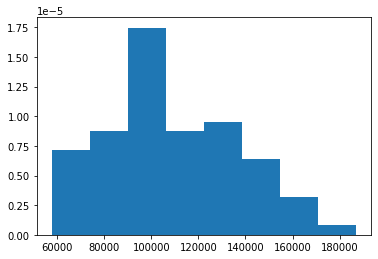

In [80]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'],bins=8, density=True)

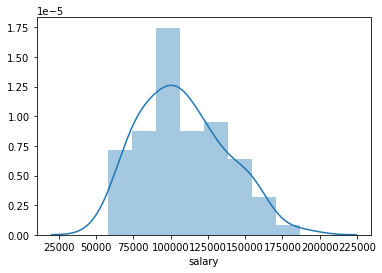

In [78]:
#Use seaborn package to draw a histogram
sns.distplot(df['salary']);

In [ ]:
# Use regular matplotlib function to display a barplot
df.groupby(['rank'])['salary'].count().plot(kind='bar')

In [ ]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")

ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

In [ ]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)

In [ ]:
#Violinplot
sns.violinplot(x = "salary", data=df)

In [ ]:
#Scatterplot in seaborn
sns.jointplot(x='service', y='salary', data=df)

In [ ]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='service', y='salary', data=df)

In [ ]:
# box plot
sns.boxplot(x='rank',y='salary', data=df)

In [ ]:
# side-by-side box plot
sns.boxplot(x='rank',y='salary', data=df, hue='sex')

In [ ]:
# swarm plot
sns.swarmplot(x='rank',y='salary', data=df)

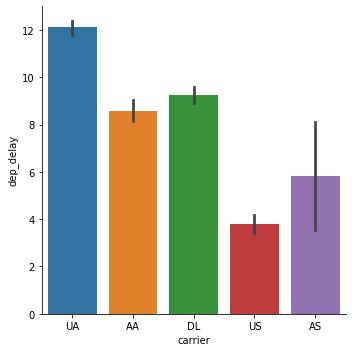

In [81]:
#factorplot
sns.catplot(x='carrier',y='dep_delay', data=flights, kind='bar')

In [ ]:
# Pairplot 
sns.pairplot(df)

---
*Exercise*

In [ ]:
#Using seaborn package explore the dependency of arr_delay on dep_delay (scatterplot or regplot) using flights dataset


---
## Basic statistical Analysis

### Linear Regression

In [ ]:
# Import Statsmodel functions:
import statsmodels.formula.api as smf

In [ ]:
# create a fitted model
lm = smf.ols(formula='salary ~ service', data=df).fit()

#print model summary
print(lm.summary())

In [ ]:
# print the coefficients
lm.params

In [ ]:
#using scikit-learn:
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
est.fit(df[['service']], df[['salary']])

#print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)


---
*Exercise* 

In [ ]:
# Build a linear model for arr_delay ~ dep_delay


#print model summary


---
### Student T-test

In [ ]:
# Using scipy package:
from scipy import stats
df_w = df[ df['sex'] == 'Female']['salary']
df_m = df[ df['sex'] == 'Male']['salary']
stats.ttest_ind(df_w, df_m)   